In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [4]:
aracaju_path = "../data/parquet/rcbp/RCBP ARACAJU.parquet"

df = pd.read_parquet(aracaju_path)

In [5]:
df['Data de Diagnostico'] = pd.to_datetime(df['Data de Diagnostico'], format='%d/%m/%Y')

In [6]:
df.head()

,Nome do RCBP,Sexo,Data de Nascimento,Idade,Raca/Cor,Nacionalidade,Naturalidade Estado,Naturalidade,Grau de Instrução,Estado Civil,...,Extensão,Lateralidade,Estadiamento,TNM,Status Vital,Tipo do Obito,Data do Óbito,Data de Último Contato,Data de Diagnostico,Metástase à distância
447092,RCBP ARACAJU,FEMININO,28/10/1950,47.0,BRANCO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SOLTEIRO,...,METÁSTASE,None,nan,nan,None,CÂNCER,16/05/2001,None,1997-12-06,None
447093,RCBP ARACAJU,MASCULINO,23/04/1976,21.0,PARDA,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,CASADO,...,NÃO SE APLICA,None,nan,nan,None,None,None,None,1997-06-15,None
447094,RCBP ARACAJU,FEMININO,20/11/1929,67.0,BRANCO,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,CASADO,...,LOCALIZADO,None,nan,nan,None,None,None,None,1997-02-13,None
447095,RCBP ARACAJU,FEMININO,None,55.0,BRANCO,BRASIL,Não informado,None,SEM INFORMAÇÃO,SEPARADO JUDICIALMENTE,...,LOCALIZADO,None,nan,nan,None,None,None,None,1997-09-22,None
447096,RCBP ARACAJU,MASCULINO,25/07/1977,19.0,BRANCO,Não informado,Não informado,Não Informado,SEM INFORMAÇÃO,SEM INFORMAÇÃO,...,LOCALIZADO,None,nan,nan,None,None,None,None,1997-04-29,None


In [7]:
print(df['Data de Diagnostico'].min())
print(df['Data de Diagnostico'].max())

1996-01-01 00:00:00
2016-12-31 00:00:00


In [8]:
datas = pd.date_range(start='1996-01-01', end='2016-12-31', freq='ME')
print(len(datas))

252


In [9]:
n_unique_months = df['Data de Diagnostico'].dt.to_period('M').nunique()
print(n_unique_months)

252


In [10]:
df_mama = df[df['Descrição da Doenca'].isin(['MAMA , SOE', 'QUADRANTE SUPERIOR EXTERNO DA MAMA', 'PROLONGAMENTO AXILAR DA MAMA',
                                            'QUADRANTE SUPERIOR INTERNO DA MAMA', 'CARCINOMA "IN SITU" DA MAMA, SOE',
                                            'PORCAO CENTRAL DA MAMA', 'QUADRANTE INFERIOR EXTERNO DA MAMA',
                                            'LESAO INVASIVA DA MAMA', 'QUADRANTE INFERIOR INTERNO DA MAMA', 'MAMA'])]

df_prostata = df[df['Descrição da Doenca'] == 'PROSTATA']

df_colo_utero = df[df['Descrição da Doenca'].isin(['COLO DO UTERO, SOE', 'OUTRAS PARTES DO COLO DO UTERO',
                                                  'LESAO INVASIVA DO COLO DO UTERO', 'COLO DO UTERO',
                                                  'CARCINOMA "IN SITU" DO COLO DO UTERO (CERVIX)'])]

df_pele = df[df['Descrição da Doenca'].isin(['PELE DE OUTRAS PARTES DA FACE, SOE', 'PELE DE OUTRAS PARTES DA FACE',
                                            'PELE DO MEMBRO INFERIOR E DO QUADRIL','PELE DA PALPEBRA E CANTO',
                                            'PELE DO TRONCO','NEOPLASIA MALIGNA DA PELE','PELE DO COURO CABELUDO E DO PESCOCO',
                                            'PELE DA ORELHA E CONDUTO AUDITIVO EXTERNO','PELE DO MEMBRO SUPERIOR E DO OMBRO',
                                            'PELE DOS MEMBROS SUPERIORES, INCLUINDO OMBRO','PELE DO LABIO',
                                            'PELE DA ORELHA E DO CONDUTO AUDITIVO EXTERNO','SARCOMA DE KAPOSI DA PELE',
                                            'PELE DA PALPEBRA, INCLUINDO CANTO','PELE DOS MEMBROS INFERIORES, INCLUINDO QUADRIL',
                                            'MELANOMA MALIGNO DA PELE, SOE','PELE, SOE','LESAO INVASIVA DA PELE',
                                            'MELANOMA MALIGNO INVASIVO DA PELE','PELE DE OUTRAS LOCALIZACOES',
                                            'OUTRAS NEOPLASIAS MALIGNAS DA PELE'])]

df_pulmao = df[df['Descrição da Doenca'].isin(['BRONQUIOS OU PULMOES, SOE', 'BRONQUIOS E PULMOES',
                                              'LESAO INVASIVA DOS BRONQUIOS E DOS PULMOES'])]

##### Mama

<Axes: xlabel='Data de Diagnostico'>

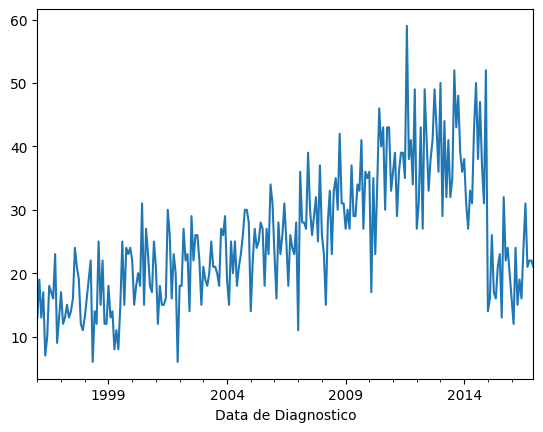

In [11]:
df_mama = df_mama.sort_values(by='Data de Diagnostico')
df_mama = df_mama.set_index('Data de Diagnostico')
result_mama_aracaju = df_mama.resample("ME")['Nome do RCBP'].count()

result_mama_aracaju.plot()

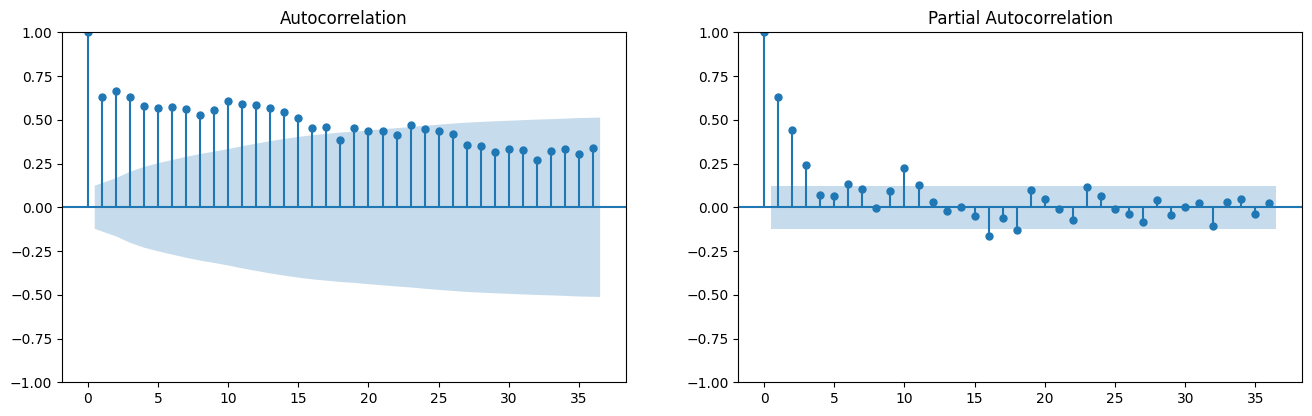

In [12]:
acf_pacf(result_mama_aracaju.values, 36)

#### Prostata

<Axes: xlabel='Data de Diagnostico'>

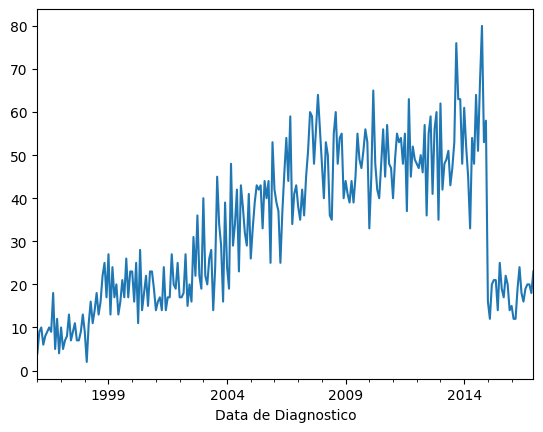

In [13]:
df_prostata = df_prostata.sort_values(by='Data de Diagnostico')
df_prostata = df_prostata.set_index('Data de Diagnostico')
result_prostata_aracaju = df_prostata.resample("ME")['Nome do RCBP'].count()

result_prostata_aracaju.plot()

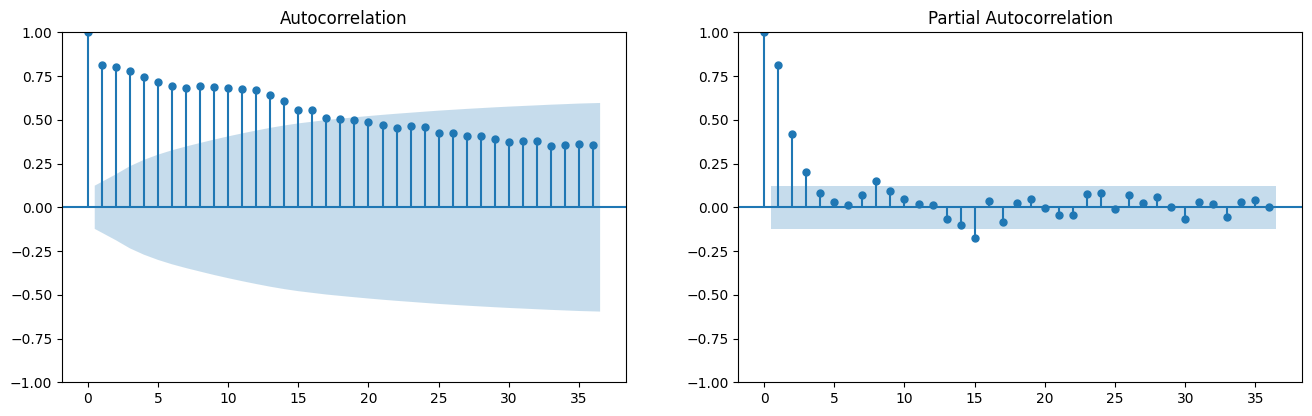

In [14]:
acf_pacf(result_prostata_aracaju.values, 36)

#### Utero

<Axes: xlabel='Data de Diagnostico'>

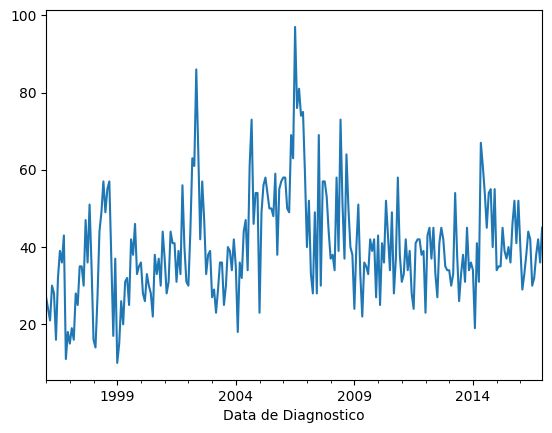

In [15]:
df_colo_utero = df_colo_utero.sort_values(by='Data de Diagnostico')
df_colo_utero = df_colo_utero.set_index('Data de Diagnostico')
result_colo_utero_aracaju = df_colo_utero.resample("ME")['Nome do RCBP'].count()

result_colo_utero_aracaju.plot()

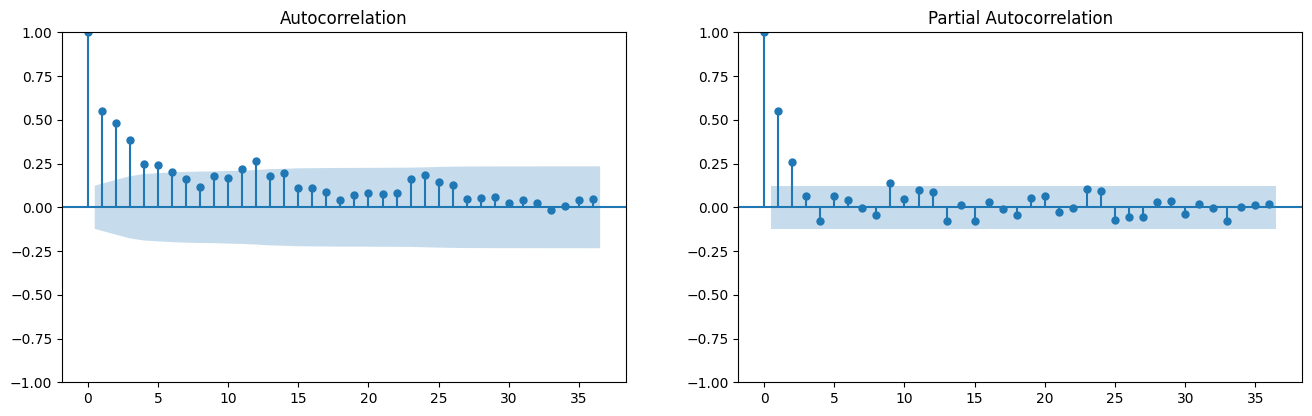

In [16]:
acf_pacf(result_colo_utero_aracaju.values, 36)

##### Pele

<Axes: xlabel='Data de Diagnostico'>

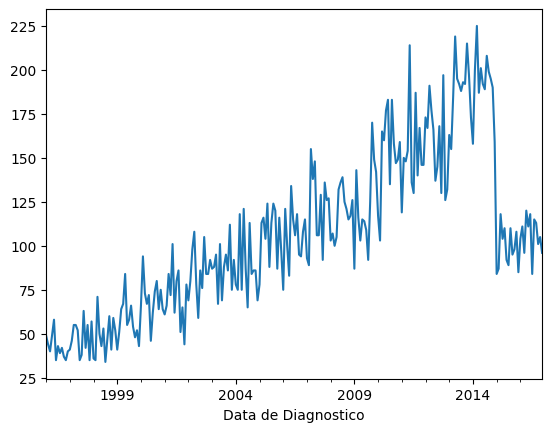

In [17]:
df_pele = df_pele.sort_values(by='Data de Diagnostico')
df_pele = df_pele.set_index('Data de Diagnostico')
result_pele_aracaju = df_pele.resample("ME")['Nome do RCBP'].count()

result_pele_aracaju.plot()

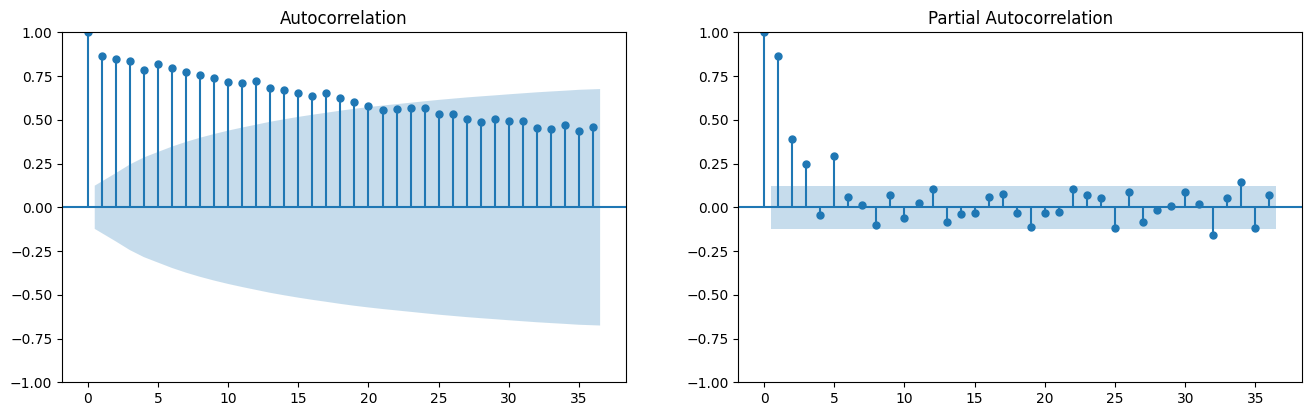

In [18]:
acf_pacf(result_pele_aracaju.values, 36)

#### Pulmao

<Axes: xlabel='Data de Diagnostico'>

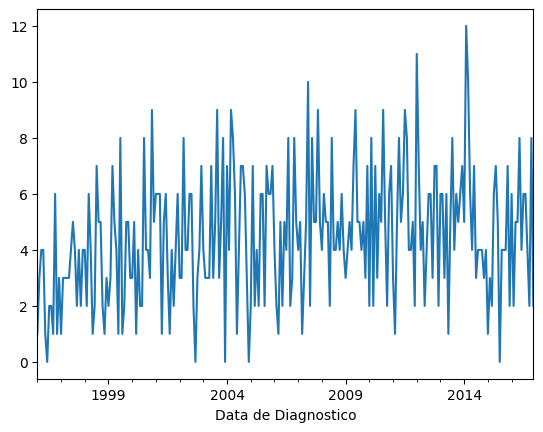

In [19]:
df_pulmao = df_pulmao.sort_values(by='Data de Diagnostico')
df_pulmao = df_pulmao.set_index('Data de Diagnostico')
result_pulmao_aracaju = df_pulmao.resample("ME")['Nome do RCBP'].count()

result_pulmao_aracaju.plot()

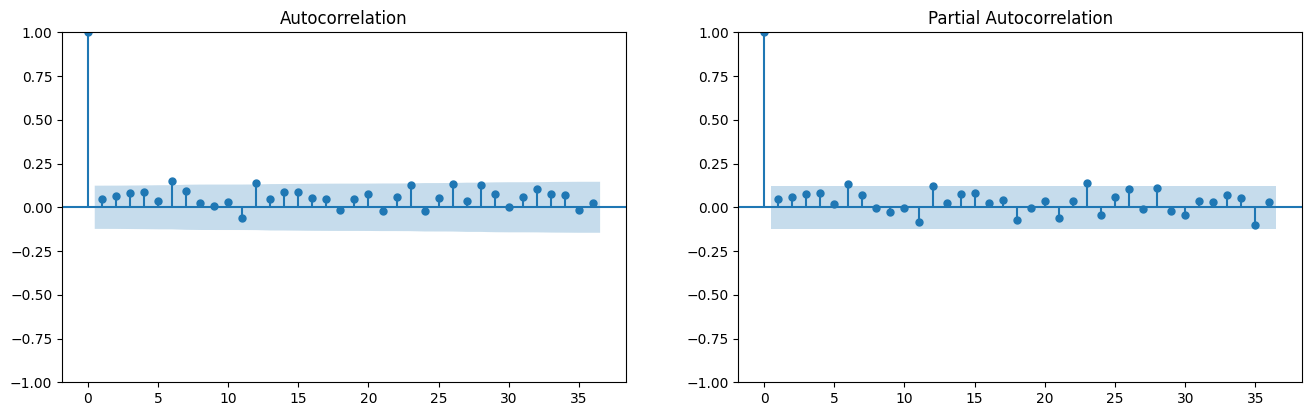

In [20]:
acf_pacf(result_pulmao_aracaju.values, 36)